<a href="https://colab.research.google.com/github/bidallei/MIAAD-UACJ/blob/main/Practica23_263150_RegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Octubre 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Hernández Jarquín, Álvaro
*   Matrícula: 263150

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Descripción del problema
Supongamos que usted es el director ejecutivo de una franquicia de restaurantes y está considerando diferentes ciudades para abrir un nuevo local. Le gustaría expandir su negocio a ciudades que podrían generar mayores ganancias para su restaurante. La cadena ya tiene restaurantes en varias ciudades y usted cuenta con datos sobre ganancias y población de dichas ciudades. Deberá construir un modelo de regresión para explicar y predecir las ganancias a partir de la población.

## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [41]:
# 1. Importa las bibliotecas necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# 2. Carga el archivo `restaurantes.csv`
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

# 3. Muestra las primeras filas del dataframe.
print("="*30)
print("Primeras filas del dataframe")
print("="*30)
print(df.head())

# 4. Describe estadísticamente el conjunto de datos.
print("="*30)
print("Descripición estadística")
print("="*30)
print(df.describe())

Primeras filas del dataframe
   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233
Descripición estadística
       poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**
Porque están correlacionadas, lo que indica que a mayor población mayor ganancia.

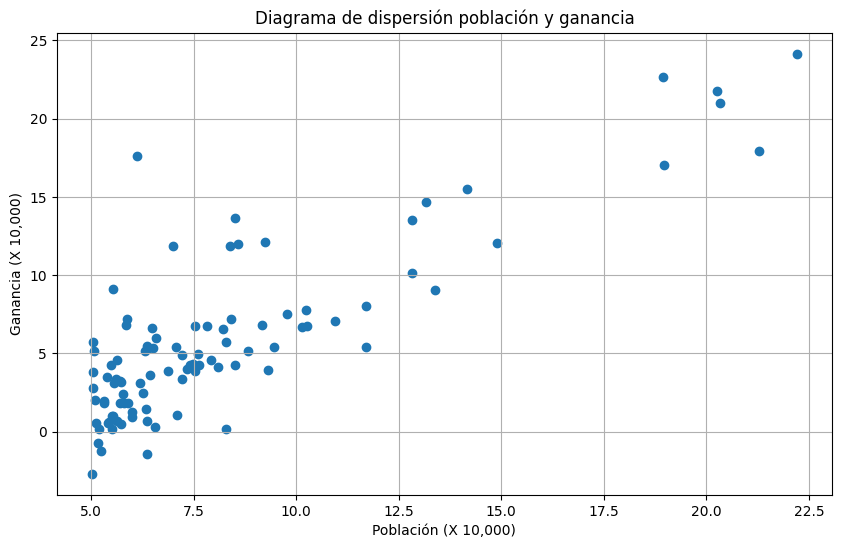

In [13]:
# 1. Grafica un diagrama de dispersión entre poblation y profit
plt.figure(figsize=(10, 6))
plt.scatter(df['poblation'], df['profit'])
plt.xlabel('Población (X 10,000)')
plt.ylabel('Ganancia (X 10,000)')
plt.title('Diagrama de dispersión población y ganancia')
plt.grid(True)
plt.show()

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
Es de 0.83, que debido a su cercanía a 1 la hace muy fuerte
- ¿Es positiva o negativa?
Es positiva
- ¿Es coherente con el gráfico anterior?
Sí, tiene relación con su linealidad

In [16]:
# 1. Calcula e imprime el coeficiente de correlación de Pearson entre poblation y profit
correlacion = df['poblation'].corr(df['profit'])
print("="*37)
print("Coeficiente de correlación de Pearson")
print("="*37)
print(correlacion)

Coeficiente de correlación de Pearson
0.837873232526341


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema? Significa que si no hay población el modelo predice que se pierden 38,957 dolares.
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema? Significa que por cada 10,000 habitantes que se agreguen se ganarán 11930 dólares.

In [29]:
# 1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
modelo = LinearRegression()
modelo.fit(df[['poblation']], df['profit'])

# 2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
print("="*59)
print(f"Intercepto: {modelo.intercept_} ")
print("="*59)
print(f"Coeficiente de la regresión (pendiente): {modelo.coef_[0]}")
print("="*59)


Intercepto: -3.8957808783118484 
Coeficiente de la regresión (pendiente): 1.1930336441895932


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

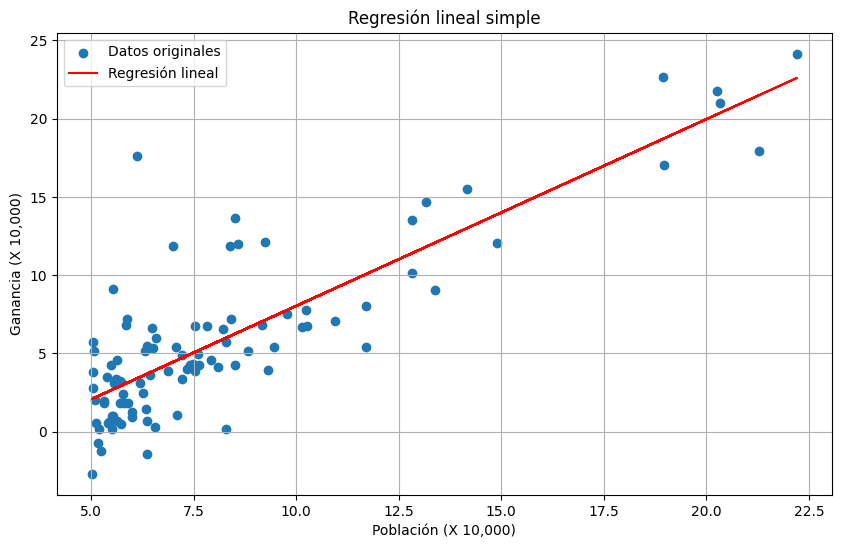

In [30]:
# 1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
plt.figure(figsize=(10, 6))
plt.scatter(df['poblation'], df['profit'], label='Datos originales')
plt.plot(df['poblation'], modelo.predict(df[['poblation']]), color='red', label='Regresión ajustada')
plt.xlabel('Población (X 10,000)')
plt.ylabel('Ganancia (X 10,000)')
plt.title('Regresión lineal simple')
plt.legend()
plt.grid(True)
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal? No, la gráfica muestra que está sesgada un poco hacia la izquierda, sin embargo, su distribución no es tan aleatoria.

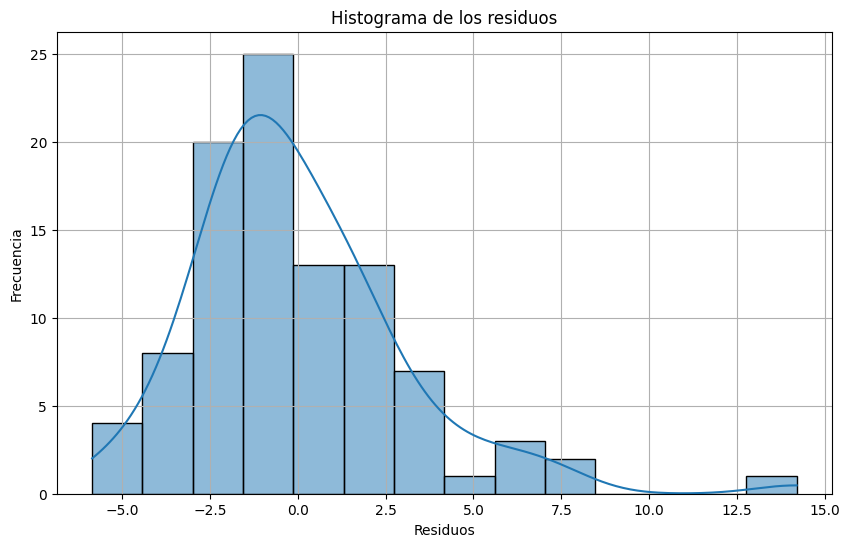

In [31]:
# Calcula los residuos: diferencia entre los valores reales y los valores predichos.
residuos = df['profit'] - modelo.predict(df[['poblation']])

# Grafica los residuos usando histograma con KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los residuos')
plt.grid(True)
plt.show()

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón? Los residuos muestran un patrón, se muestran más en valores predichos bajos.

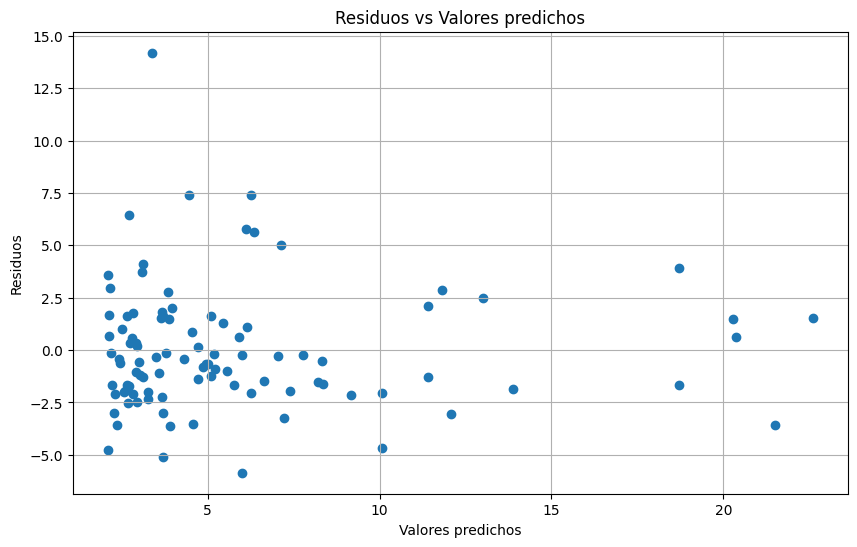

In [32]:
# Gráfico de residuos vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(modelo.predict(df[['poblation']]), residuos)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores predichos')
plt.grid(True)
plt.show()


### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico:
-  Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y
- Desviaciones sistemáticas indican asimetría o colas pesadas.

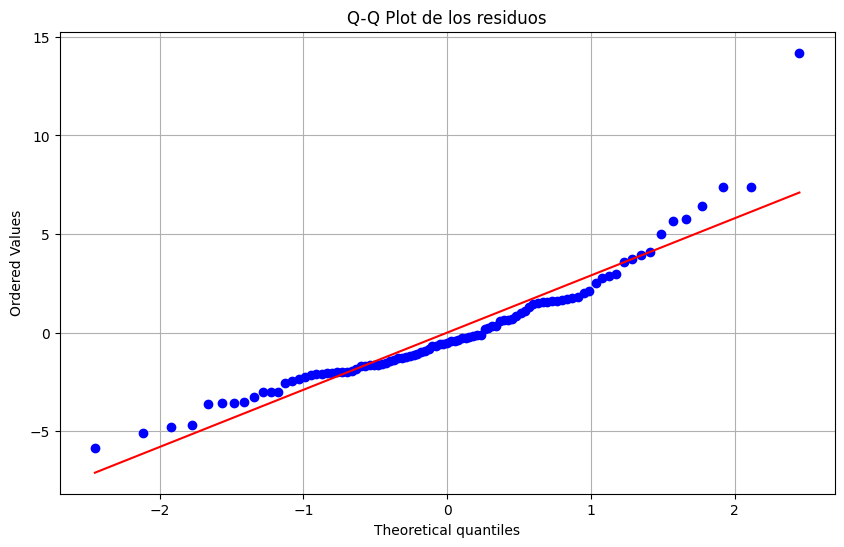

In [42]:
# Graficar el Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.grid(True)
plt.show()



## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta ¿Qué nos dicen sobre el ajuste del modelo?
El Mse de 8.95 indica que el modelo es de efectividad aceptable. Así lo refuerza en RMSE y el R2 que es menor que 1.

In [38]:
# MSE (Error cuadrático medio)
mse = mean_squared_error(df['profit'], modelo.predict(df[['poblation']]))
print("="*25)
print(f"MSE: {mse}")
print("="*25)

# RMSE (Raíz del error cuadrático medio)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print("="*25)

# R² (Coeficiente de determinación)
r2 = r2_score(df['profit'], modelo.predict(df[['poblation']]))
print(f"R²: {r2}")
print("="*25)

MSE: 8.953942751950358
RMSE: 2.9923139460876023
R²: 0.7020315537841397


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
El modelo es moderadamente útil, predice de forma aceptable, pero hay un 30% de variación que se podría explicar por otros factores.
- ¿Qué limitaciones encuentras?
No se alcanza un porcentaje de efectividad alto, se observan patrones en los residuos, y solo se cuenta con una variable independiente, si se tuvieran más variables se podría tener un modelo más efectivo.
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.
No considero que sea necesario hacer una estandarización porque solo tenemos una variable y las unidades de esta variable no afectan el resultado del modelo.